<a href="https://colab.research.google.com/github/mia1996/rlcard-tutoirial/blob/master/blackjack_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Deep-Q Learning on Blackjack**
This example is to use Deep-Q learning to train an agent on Blackjack. We aim to use this example to show how reinforcement learning algorithms can be developed and applied in our toolkit. To be self-contained, we first install RLCard.

Now we import `rlcard` and `DQNAgent`. The `DQNAgent` will learn how to win the game.

In [8]:
import rlcard
from rlcard.agents import DQNAgent

Let's create the Blackjack environment and take a look at it.

In [9]:
env = rlcard.make("blackjack")
print("Number of actions:", env.num_actions)
print("Number of players:", env.num_players)
print("Shape of state:", env.state_shape)
print("Shape of action:", env.action_shape)

Number of actions: 2
Number of players: 1
Shape of state: [[2]]
Shape of action: [None]


Blackjack is a very simple game with only two possible actions. There is only one player. It's time for us to train our DQN to master this game! We first create a DQNAgent.

In [10]:
agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[64,64],
)

Here, we use a 64-64 deep neural network to learn. Then we pass the DQNAgent to the environment.

In [11]:
env.set_agents([agent])

Now we are ready to train! We first import some useful classes and functions for training.

In [12]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)

Then start the training and log the performance with our `Logger`. The script below will train DQN for 1000 epochs (i.e., 1000 games). Usually, the agent will become stronger if trained longer.

In [15]:
with Logger("experiments/blackjack_dqn_result/") as logger:
    for episode in range(10000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path

INFO - Step 2479, rl-loss: 0.5512102842330933
----------------------------------------
  timestep     |  473178
  reward       |  -0.0754
----------------------------------------
INFO - Step 2552, rl-loss: 0.35416424274444584
----------------------------------------
  timestep     |  487356
  reward       |  -0.0609
----------------------------------------
INFO - Step 2623, rl-loss: 0.55275630950927735
----------------------------------------
  timestep     |  501459
  reward       |  -0.0725
----------------------------------------
INFO - Step 2684, rl-loss: 0.49703183770179755
----------------------------------------
  timestep     |  515749
  reward       |  -0.089
----------------------------------------
INFO - Step 2759, rl-loss: 0.52050423622131356
----------------------------------------
  timestep     |  530150
  reward       |  -0.0806
----------------------------------------
INFO - Step 2838, rl-loss: 0.37900656461715724
----------------------------------------
  timestep    

Now we plot the learning curves to monitor how the agent gets improved!

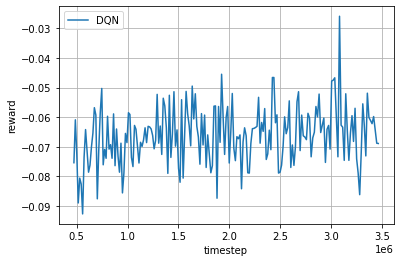

In [16]:
plot_curve(csv_path, fig_path, "DQN")